In [34]:
import os
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
csv_file = 'untouched.csv'

In [4]:
IN_FILE = csv_file    
OUT_FILE = 'untouched.npy'

# The bag2csv script generates empty header names so the real
# tactile values are stored in other columns
FF_TAC_ATT = 'tdc'
MF_TAC_ATT = 'tac.1'
TH_TAC_ATT = 'pac0.4'

FINGERS = 3
ELECTRODES = 24

# Read CSV and fill numpy object
raw_df = pd.read_csv(IN_FILE)
tactiles_df = raw_df[[FF_TAC_ATT, MF_TAC_ATT, TH_TAC_ATT]]
tactiles_np = np.zeros([tactiles_df.shape[0], FINGERS, ELECTRODES], dtype=int)

for index, row in tactiles_df.iterrows():
    ff_values = row[FF_TAC_ATT]
    ff_values = ff_values.replace('[', '').replace(']', '')
    ff_values = [int(x) for x in ff_values.split(', ')]

    mf_values = row[MF_TAC_ATT]
    mf_values = mf_values.replace('[', '').replace(']', '')
    mf_values = [int(x) for x in mf_values.split(', ')]

    th_values = row[TH_TAC_ATT]
    th_values = th_values.replace('[', '').replace(']', '')
    th_values = [int(x) for x in th_values.split(', ')]

    tactiles_np[index, 0, :] = ff_values
    tactiles_np[index, 1, :] = mf_values
    tactiles_np[index, 2, :] = th_values

('IN_FILE', 'untouched.csv')
('OUT_FILE', 'untouched.npy')


In [17]:
ff_np = np.reshape(tactiles_np[:, 0, :], (-1))
mf_np = np.reshape(tactiles_np[:, 1, :], (-1))
th_np = np.reshape(tactiles_np[:, 2, :], (-1))

In [69]:
_, ff_min_max, ff_mean, ff_variance, _, _ = stats.describe(ff_np)
ff_std = np.std(ff_np)

In [70]:
_, mf_min_max, mf_mean, mf_variance, _, _ = stats.describe(mf_np)
mf_std = np.std(mf_np)

In [72]:
_, th_min_max, th_mean, th_variance, _, _ = stats.describe(th_np)
th_std = np.std(th_np)

In [73]:
mins = [ff_min_max[0], mf_min_max[0], th_min_max[0]]
maxs = [ff_min_max[1], mf_min_max[1], th_min_max[1]]
means = [ff_mean, mf_mean, th_mean]
variances = [ff_variance, mf_variance, th_variance]
stds = [ff_std, mf_std, th_std]

inds = range(3)

Mins: [1607, 2616, 2383]


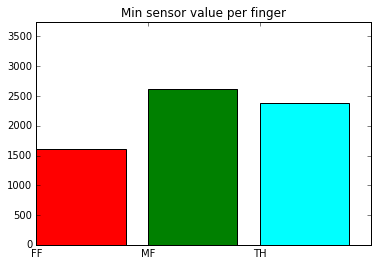

In [81]:
plt.bar(inds, mins, color=['red', 'green', 'cyan'])
plt.ylim(0, 3750)

plt.title('Min sensor value per finger')
plt.xticks(inds, ('FF', 'MF', 'TH'))

print 'Mins:', mins

Maxs: [3181, 3488, 3276]


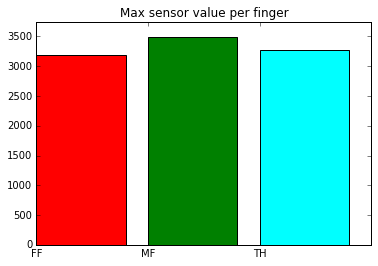

In [82]:
plt.bar(inds, maxs, color=['red', 'green', 'cyan'])
plt.ylim(0, 3750)

plt.title('Max sensor value per finger')
plt.xticks(inds, ('FF', 'MF', 'TH'))

print 'Maxs:', maxs

Means: [2815.290216649608, 3256.6313971340837, 2984.2897475264413]
Stds: [287.00657538171123, 197.845728169163, 236.90013125285444]


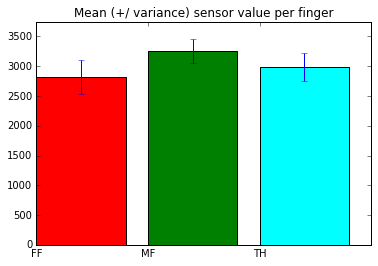

In [85]:
plt.bar(inds, means, yerr=stds, color=['red', 'green', 'cyan'])
plt.ylim(0, 3750)

plt.title('Mean (+/ std) sensor value per finger')
plt.xticks(inds, ('FF', 'MF', 'TH'))

print 'Means:', means
print 'Stds:', stds